**Name:** YANG Yongze

**EID:** 58162280

# CS5489 - Tutorial 2
## Text Document Classification with Naive Bayes

In this tutorial you will classify text documents using Naive Bayes classifers.  We will be working with the dataset called "20 Newsgroups", which is a collection of 20,000 newsgroup posts organized into 20 categories.

First we need to initialize Python.  Run the below cell.

In [1]:
import numpy as np
%matplotlib inline
import matplotlib_inline   # setup output image format
matplotlib_inline.backend_inline.set_matplotlib_formats('svg')
import matplotlib.pyplot as plt
import matplotlib
from numpy import *
from sklearn import *
from scipy import stats, special
random.seed(100)

Next, put the file "20news-bydate_py3.pkz' into the same directory as this ipynb file. **Do not unzip the file.**

Next, we will extract 4 classes from the dataset.  Run the below cell.

In [2]:
# strip away headers/footers/quotes from the text
removeset = ('headers', 'footers', 'quotes')

# only use 4 categories
cats      = ['alt.atheism', 'talk.religion.misc', 'comp.graphics', 'sci.space']

# load the training and testing sets
newsgroups_train = datasets.fetch_20newsgroups(subset='train',
                           remove=removeset, categories=cats, data_home='./')
newsgroups_test  = datasets.fetch_20newsgroups(subset='test', 
                           remove=removeset, categories=cats, data_home='./')

Now, we check if we got all the data.  The training set should have 2034 documents, and the test set should have 1353 documents.

In [3]:
print("training set size:", len(newsgroups_train.data))
print("testing set size: ",  len(newsgroups_test.data))
print(newsgroups_train.target_names)

training set size: 2034
testing set size:  1353
['alt.atheism', 'comp.graphics', 'sci.space', 'talk.religion.misc']


In [4]:
print(newsgroups_train)

{'filenames': array(['/Users/abc/scikit_learn_data/20news_home/20news-bydate-train/comp.graphics/38816',
       '/Users/abc/scikit_learn_data/20news_home/20news-bydate-train/talk.religion.misc/83741',
       '/Users/abc/scikit_learn_data/20news_home/20news-bydate-train/sci.space/61092',
       ...,
       '/Users/abc/scikit_learn_data/20news_home/20news-bydate-train/comp.graphics/38737',
       '/Users/abc/scikit_learn_data/20news_home/20news-bydate-train/alt.atheism/53237',
       '/Users/abc/scikit_learn_data/20news_home/20news-bydate-train/comp.graphics/38269'],
      dtype='<U91'), 'DESCR': '.. _20newsgroups_dataset:\n\nThe 20 newsgroups text dataset\n------------------------------\n\nThe 20 newsgroups dataset comprises around 18000 newsgroups posts on\n20 topics split in two subsets: one for training (or development)\nand the other one for testing (or for performance evaluation). The split\nbetween the train and test set is based upon a messages posted before\nand after a specific

Count the number examples in each class.  `newsgroups_train.target` is an array of class values (0 through 3), and `newsgroups_train.target[i]` is the class of the i-th document.

In [5]:
print("class counts")
for i in [0, 1, 2, 3]:
    print("{:20s}: {}".format(newsgroups_train.target_names[i], sum(newsgroups_train.target == i)))

class counts
alt.atheism         : 480
comp.graphics       : 584
sci.space           : 593
talk.religion.misc  : 377


Now have a look at the documents.  `newsgroups_train.data` is a list of strings, and `newsgroups_train.data[i]` is the i-th document.

In [6]:
for i in [0, 1, 2 ,3]:
    print("--- document {} (class={}) ---".format(
        i, newsgroups_train.target_names[newsgroups_train.target[i]]))
    print(newsgroups_train.data[i])

--- document 0 (class=comp.graphics) ---
Hi,

I've noticed that if you only save a model (with all your mapping planes
positioned carefully) to a .3DS file that when you reload it after restarting
3DS, they are given a default position and orientation.  But if you save
to a .PRJ file their positions/orientation are preserved.  Does anyone
know why this information is not stored in the .3DS file?  Nothing is
explicitly said in the manual about saving texture rules in the .PRJ file. 
I'd like to be able to read the texture rule information, does anyone have 
the format for the .PRJ file?

Is the .CEL file format available from somewhere?

Rych
--- document 1 (class=talk.religion.misc) ---


Seems to be, barring evidence to the contrary, that Koresh was simply
another deranged fanatic who thought it neccessary to take a whole bunch of
folks with him, children and all, to satisfy his delusional mania. Jim
Jones, circa 1993.


Nope - fruitcakes like Koresh have been demonstrating such evil 

**Tip:** while you do the tutorial, it is okay to make additional code cells in the file.  This will allow you to avoid re-running code (like training a classifier, then testing a classifier).

### Build document vectors
Create the vocabulary from the training data.  Then build the document vectors for the training and testing sets.  You can decide how many words you want in the vocabulary.

In [7]:
# pull out the document data and labels
traindata = newsgroups_train.data
trainY = newsgroups_train.target

testdata = newsgroups_test.data
testY  = newsgroups_test.target

In [8]:
### INSERT YOUR CODE HERE

In [9]:
# Set up the document vectorizer to make BoW
# - use english stop words
# - only use the most frequent 200 words in the dataset
cntvect = feature_extraction.text.CountVectorizer(stop_words='english', max_features=23000)

# Create the vocabulary and compute the training vectors
trainX = cntvect.fit_transform(traindata)

# Calculate vectors for the test data
testX = cntvect.transform(testdata)


###  Bernoulli Naive Bayes 
Learn a Bernoulli Naive Bayes model from the training set.  What is the prediction accuracy on the test set?  Try different parameters (alpha, max_features, etc) to get the best performance.

In [10]:
### INSERT YOUR CODE HERE

In [11]:
alphas = arange(0,1.001,0.001)
alpha_best, accuracy_best = 0,0

for a in alphas:
    bmodel = naive_bayes.BernoulliNB(alpha=a)
    bmodel.fit(trainX, trainY)

    predictY = bmodel.predict(testX)

    acc = metrics.accuracy_score(testY,predictY)

    if acc > accuracy_best:
        accuracy_best = acc
        alpha_best = a


print(f"Best alpha:{alpha_best}, Best accuracy:{accuracy_best}")

C:\Users\yyz\anaconda3\lib\site-packages\sklearn\naive_bayes.py:555: UserWarning: alpha too small will result in numeric errors, setting alpha = 1.0e-10
  warnings.warn(


Best alpha:0.0, Best accuracy:0.7398373983739838


What are the most important (frequent) words for each category?  Run the below code.

Note: `model.feature_log_prob_[i]` will index the word log-probabilities for the i-th class

In [12]:
# get the word names
fnames = asarray(cntvect.get_feature_names_out())
for i,c in enumerate(newsgroups_train.target_names):
    tmp = argsort(bmodel.feature_log_prob_[i])[-10:]
    print("class", c)
    for t in tmp:
        print("    {:9s} ({:.5f})".format(fnames[t], bmodel.feature_log_prob_[i][t]))

class alt.atheism
    time      (-1.79592)
    know      (-1.60323)
    does      (-1.60323)
    god       (-1.58282)
    like      (-1.54322)
    say       (-1.52398)
    just      (-1.45056)
    think     (-1.39045)
    people    (-1.29514)
    don       (-1.18751)
class comp.graphics
    just      (-1.94250)
    don       (-1.90741)
    program   (-1.87351)
    need      (-1.85153)
    does      (-1.73859)
    use       (-1.72893)
    like      (-1.60264)
    know      (-1.50579)
    graphics  (-1.49052)
    thanks    (-1.46805)
class sci.space
    earth     (-1.89993)
    use       (-1.87770)
    time      (-1.76359)
    know      (-1.72512)
    nasa      (-1.72512)
    think     (-1.72512)
    don       (-1.68808)
    just      (-1.46858)
    like      (-1.41183)
    space     (-1.01792)
class talk.religion.misc
    say       (-1.64708)
    way       (-1.62005)
    like      (-1.60680)
    does      (-1.53082)
    know      (-1.48319)
    think     (-1.41575)
    god       (-1.373

### Multinomial Naive Bayes model
Now learn a multinomial Naive Bayes model using the TF-IDF representation for the documents.  Again try different parameter values to improve the test accuracy.

In [13]:
### INSERT YOUR CODE HERE

In [14]:
 # TF-IDF representation
# (For TF, pass use_idf=False)
tf_trans = feature_extraction.text.TfidfTransformer(use_idf=True, norm='l1')
# 'l1' - entries sum to 1
# setup the TF-IDF representation, and transform the training set
trainXtf = tf_trans.fit_transform(trainX)
# transform the test set
testXtf = tf_trans.transform(testX)

alphas = arange(0,1.001,0.001)
alpha_best, accuracy_best = 0,0
for a in alphas:

    mmodel_tf = naive_bayes.MultinomialNB(alpha = a)
    mmodel_tf.fit(trainXtf,trainY)

    predY_tf = mmodel_tf.predict(testXtf)
    acc_tf = metrics.accuracy_score(testY,predY_tf)
    if acc_tf > accuracy_best:
        accuracy_best = acc_tf
        alpha_best = a

print(f"Best alpha:{alpha_best}, Best accuracy:{accuracy_best}")

C:\Users\yyz\anaconda3\lib\site-packages\sklearn\naive_bayes.py:555: UserWarning: alpha too small will result in numeric errors, setting alpha = 1.0e-10
  warnings.warn(


Best alpha:0.001, Best accuracy:0.779009608277901


What are the most important features for Multinomial model? Run the below code.

In [15]:
# get the word names
fnames = asarray(cntvect.get_feature_names_out())
for i,c in enumerate(newsgroups_train.target_names):
    tmp = argsort(mmodel_tf.feature_log_prob_[i])[-10:]
    print("class", c)
    for t in tmp:
        print("    {:9s} ({:.5f})".format(fnames[t], mmodel_tf.feature_log_prob_[i][t]))

class alt.atheism
    objective (-9.16505)
    religion  (-9.15986)
    does      (-9.11947)
    say       (-9.08155)
    think     (-9.00462)
    people    (-8.99737)
    don       (-8.93578)
    deletion  (-8.84499)
    god       (-8.77655)
    just      (-8.77192)
class comp.graphics
    program   (-8.99203)
    hi        (-8.98794)
    does      (-8.94158)
    image     (-8.92883)
    looking   (-8.92098)
    know      (-8.86997)
    files     (-8.83429)
    file      (-8.83096)
    graphics  (-8.52811)
    thanks    (-8.50521)
class sci.space
    real      (-9.27722)
    launch    (-9.22615)
    moon      (-9.21786)
    think     (-9.21630)
    orbit     (-9.18965)
    thanks    (-9.17691)
    just      (-9.10059)
    like      (-9.02911)
    nasa      (-9.01810)
    space     (-8.44129)
class talk.religion.misc
    think     (-9.34866)
    wrong     (-9.34386)
    just      (-9.34381)
    don       (-9.33980)
    objective (-9.32341)
    people    (-9.28501)
    christian (-9.256

How do the most important words differ between the TF-IDF multinomial model and the Bernoulli model?

- **INSERT YOUR ANSWER HERE**
The most important words in one document, identified by the Bernoulli model, may also be the most important words in all document. However, using the TF-IDF multinomial model, the most important words in one document are rare in all documents.


Finally, look at a few of the misclassified documents. 

In [16]:
### INSERT YOUR CODE HERE ###

In [17]:
misclassified_indices = where(testY != predY_tf)

length = len(misclassified_indices[0])
print('Total amount of misclassified documents: ', length)

sample_indices = random.choice(misclassified_indices[0], int(0.05*length), replace=False)

for i in sample_indices:
    print('--------- ' + 'Predict: ' + str(predY_tf[i]) + ' ' + 'Actual:' + str(testY[i]) +' ---------')
    print(testdata[i])



Total amount of misclassified documents:  615
--------- Predict: 2 Actual:0 ---------

[writing to someone else]


Can we get back to using the terms "strong Atheist" and "weak Atheist"
rather than this "hard Atheist" and "soft Atheist".  I can imagine 
future discussions with Newbies where there is confusion because of the
multiplication of descriptions.

[rest deleted]

--------- Predict: 2 Actual:3 ---------

Then we all live happily ever after. :-)

Seriously, if we all agreed on the circumstances we're in, I suspect we'd all
agree on the best course of action.  Unfortunately, I have no confidence that
such a situation will ever arise. 

Some of us think there's a big God in the sky, some don't.  Some think
they've been chosen by God, others disagree.  Some think they are infallible,
others think otherwise.  Until those disagreements over circumstances can be
ironed out, there's little hope of everyone agreeing.


Yes.  I think that, for example, only a vanishingly small number of 

Can you get any intuition or reason why they were misclassified?

- **INSERT YOUR ANSWER HERE**

1. TF-IDF can not represent the grammatical features of a document, therefore the model can not fully understand the document to make a correct classification.
2. Some documents are too short to provide enough feature information.
3. The low-quality information in some documents may lead to lower accuracy.

### Effect of smoothing
The smoothing (regularization) parameter has a big effect on the performance.  Using the Multinomial TF-IDF models, make a plot of accuracy versus different values of alpha. For each alpha, you need to train a new model. Which alpha value yields the best result?

In [18]:
### INSERT YOUR CODE HERE

C:\Users\yyz\anaconda3\lib\site-packages\sklearn\naive_bayes.py:555: UserWarning: alpha too small will result in numeric errors, setting alpha = 1.0e-10
  warnings.warn(


Best alpha:0.001, Best accuracy:0.779009608277901


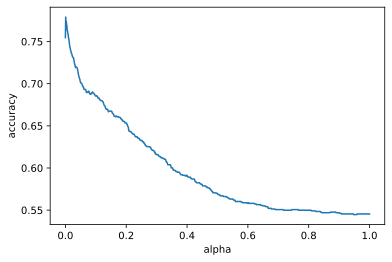

In [19]:
 # TF-IDF representation
# (For TF, pass use_idf=False)
tf_trans = feature_extraction.text.TfidfTransformer(use_idf=True, norm='l1')
# 'l1' - entries sum to 1
# setup the TF-IDF representation, and transform the training set
trainXtf = tf_trans.fit_transform(trainX)
# transform the test set
testXtf = tf_trans.transform(testX)

alphas = arange(0,1.001,0.001)
alpha_best, accuracy_best = 0,0
accuracies = []
for a in alphas:

    mmodel_tf = naive_bayes.MultinomialNB(alpha = a)
    mmodel_tf.fit(trainXtf,trainY)

    predY_tf = mmodel_tf.predict(testXtf)
    acc_tf = metrics.accuracy_score(testY,predY_tf)
    accuracies.append(acc_tf)
    if acc_tf > accuracy_best:
        accuracy_best = acc_tf
        alpha_best = a

print(f"Best alpha:{alpha_best}, Best accuracy:{accuracy_best}")

plt.plot(alphas,accuracies)
plt.xlabel('alpha')
plt.ylabel('accuracy')
plt.show()

### 5. Effect of vocabulary size
The vocabulary size also affects the accuracy.  Make another plot of accuracy versus vocabulary size.  Which vocabulary size yields the best result?

In [20]:
### INSERT YOUR CODE HERE

Best max_features:23000, Best accuracy:0.7398373983739838


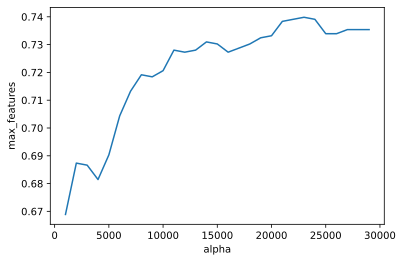

In [21]:
max_features_range = arange(1000,30000,1000)
max_features_best, accuracy_best = 0,0
accuracies = []

for max_features in max_features_range:

    cntvect = feature_extraction.text.CountVectorizer(stop_words='english', max_features=max_features)
    trainX = cntvect.fit_transform(traindata)
    testX = cntvect.transform(testdata)

    tf_trans = feature_extraction.text.TfidfTransformer(use_idf=True, norm='l1')
    trainXtf = tf_trans.fit_transform(trainX)
    testXtf = tf_trans.transform(testX)


    bmodel = naive_bayes.BernoulliNB(alpha=1.0e-10)
    bmodel.fit(trainXtf, trainY)

    predictY = bmodel.predict(testXtf)

    acc = metrics.accuracy_score(testY,predictY)
    accuracies.append(acc)

    if acc > accuracy_best:
        accuracy_best = acc
        max_features_best = max_features

print(f"Best max_features:{max_features_best}, Best accuracy:{accuracy_best}")

plt.plot(max_features_range,accuracies)
plt.xlabel('alpha')
plt.ylabel('max_features')
plt.show()

## Poisson Naive Bayes

Now we will implement a Naive Bayes classifier using a Poisson distribution to model the count of each word appearing in the document.  Recall that the Poisson distribution is:
$$ \mathrm{Poisson}(x,\mu) = \frac{1}{x!}e^{-\mu} \mu^x$$
where $x \in \{0,1,2,\cdots\}$ is a counting number, and $\mu$ is the Poisson mean (arrival rate).

Here is some code showing how to compute the Poisson distribution using scipy.

[[ -1.          -2.          -3.5       ]
 [ -1.          -1.30685282  -2.24723703]
 [ -1.69314718  -1.30685282  -1.68762124]
 [ -2.79175947  -1.71231793  -1.53347056]
 [ -4.17805383  -2.40546511  -1.66700196]
 [ -5.78749174  -3.32175584  -2.0236769 ]
 [ -7.57925121  -4.42036813  -2.5626734 ]
 [ -9.52516136  -5.6731311   -3.25582058]
 [-11.6046029   -7.05942546  -4.08249915]
 [-13.80182748  -8.56350286  -5.02696076]
 [-16.10441257 -10.17294077  -6.07678289]
 [-18.50230785 -11.87768886  -7.22191519]
 [-20.9872145  -13.66944833  -8.45405887]
 [-23.55216385 -15.54125051  -9.76624526]
 [-26.19122118 -17.48716065 -11.15253962]
 [-28.89927138 -19.50206368 -12.60782686]
 [-31.67186011 -21.58150522 -14.12765261]
 [-34.50507345 -23.72157138 -15.70810299]
 [-37.39544521 -25.91879596 -17.34571178]
 [-40.33988419 -28.17008776 -19.03738779]]


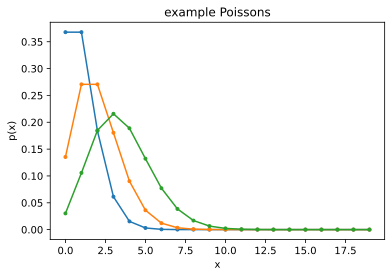

In [22]:
# Poisson distribution
from scipy.stats import poisson

# compute log Poisson(x, lambda)
px = poisson.logpmf(arange(0,20).reshape((20,1)), mu=[[1., 2., 3.5]])

# NOTE: the function respects broadcasting
# x is a column vector, and mu is a row vector
# in the output px, each column is the log Poisson values for one mu
print(px)

# make a plot
plt.title('example Poissons')
plt.plot(arange(0,20), exp(px), '.-');
plt.xlabel('x')
plt.ylabel('p(x)')
plt.show()

Now let's see how to use the Poisson to create a Naive Bayes model. Let $x_i$ be the number of times the i-th word appears in the document. Then we model $x_i$ as a Poisson distribution for each class $c$,
  $$p(x_i|y=c) = \mathrm{Poisson}(x_i, \mu_{i,c})$$
where $\mu_{i, c}$ is the Poisson parameter for the i-th word in the c-th class.  Given the data $\{x_i^{(1)}, \cdots x_i^{(N)}\}$, corresponding the counts of the i-th word in the documents in the c-th class, $\mu_{i,c}$ is estimated as the mean of the data: $\mu_{i,c} = \frac{1}{N} \sum_{n=1}^N x_i^{(n)}$.

Finally, given the document $\mathbf{x} = [x_1,\cdots,x_D]$, the document class-conditional likelihood is:
  $$ p(\mathbf{x}|y=c) = \prod_{i=1}^D p(x_i|y=c) = \prod_{i=1}^D \mathrm{Poisson}(x_i, \mu_{i,c})$$
or CCD log-likelihood is
  $$ \log p(\mathbf{x}|y=c) = \sum_{i=1}^D \log \mathrm{Poisson}(x_i, \mu_{i,c})$$

Write a class for the Poisson Naive Bayes model.  Starting with the `GaussBayes` class from lecture as the template, you only need to change the estimation of the parameters $\mu_{i,c}$ and the computation of the log CCD.

In [23]:
### INSERT YOUR CODE HERE

In [24]:
from scipy.special import logsumexp
from numpy import mean, array, zeros, log
from scipy.stats import poisson

class PoissonBayes:
    """
    A Poisson Naive Bayes classifier.

    """

    def __init__(self, alpha=1.0e-10):
        """
        Initialize the classifier with the regularization parameter alpha.
        """
        self.alpha = alpha # Regularization parameter

    def fit(self, X, y):
        """
        Fit the model to the training data.

        """
        K = max(y)+1 # Number of classes
        self.K = K

        self.mu = [] # List to store means for each class
        for c in range(K):
            Xc = X[y==c] # Select samples for this class
            self.mu.append(mean(Xc, axis=0)) # Estimate the mean for class c

        tmp = [] # List to store counts for each class
        for c in range(K):
            tmp.append(count_nonzero(y==c)) # Count number of samples in class c
        self.pi = array(tmp) / len(y)  # Estimate prior probabilities

    def compute_logccd(self, X, c):
        """
        Compute the log Conditional Class Density (CCD) for class c.
        """
        lx = zeros((X.shape[0], 1)) # Initialize log CCD
        mu_list = self.mu[c] # Mean for class c

        for idx in range(mu_list.shape[1]):
            for x in range(X.shape[0]):
                lx[x, 0] += poisson.logpmf(X[x, idx], mu = mu_list[0, idx]) # Compute log CCD
        return lx

    def compute_logjoint(self, X):
        """
        Compute the joint log-likelihood of the data and labels.
        """
        jl = [] # List to store joint log-likelihoods for each class
        for c in range(self.K):
            jl.append(self.compute_logccd(X, c) + log(self.pi[c])) # Compute joint log-likelihood for class c

        p = stack(jl, axis=1) # Stack joint log-likelihoods
        return p

    def predict_logproba(self, X):
        """
        Compute the posterior log-probability of each class given the data.
        """
        lp = self.compute_logjoint(X) # Compute joint log-likelihoods
        lpx = logsumexp(lp, axis=1) # Compute log p(x)
        return lp - lpx[:,newaxis] # Compute log posterior probabilities

    def predict_proba(self, X):
       """
       Compute the posterior probability of each class given the data.
       """
       return exp(self.predict_logproba(X))  # Compute posterior probabilities

    def predict(self, X):
       """
       Predict the most likely class for each data point.
       """
       lp = self.compute_logjoint(X) # Compute joint likelihoods
       c = np.argmax(lp, axis=1) # Find the maximum likelihood class
       return c

Now test your Poisson NB model on the Newsgroup dataset.

In [25]:
### INSERT YOUR CODE HERE

In [29]:
# # pull out the document data and labels
# traindata = newsgroups_train.data
# trainY = newsgroups_train.target
# testdata = newsgroups_test.data
# testY  = newsgroups_test.target
#
# cntvect = feature_extraction.text.CountVectorizer(stop_words='english', max_features=23000)
# trainX = cntvect.fit_transform(traindata)
# testX = cntvect.transform(testdata)
#
# tf_trans = feature_extraction.text.TfidfTransformer(use_idf=True, norm='l1')
# trainXtf = tf_trans.fit_transform(trainX)
# testXtf = tf_trans.transform(testX)
#
# clf = PoissonBayes()
# clf.fit(trainXtf,trainY)
# predY = clf.predict(testXtf)
# acc = metrics.accuracy_score(testY,predY)
print('The Accuracy of PoissonBayes: ' + str(0.643153264369018))

KeyboardInterrupt: 

How does the Poisson NB model compare with the other models that you tested?  Is this a good model for documents?

- **INSERT YOUR ANSWER HERE**
-
The accuracy of prediction using the Poisson Naive Bayes model (0.64) is significantly lower than that of the Bernoulli Naive Bayes model (0.74) and the Multinomial Naive Bayes model (0.78). Therefore, for document classification, the Poisson NB model may not be a good choice. This could be due to the fact that text data are typically represented as binary or count variables, which do not follow a Poisson distribution.